# Lab 4 Primitive Transformations

## Task 1: Image Negatives
Implement a function for displaying negative of an input image. Note that the function must handle binary, grayscale, and RGB images.

In [1]:
from PIL import  Image
import numpy as np

In [2]:
def negative_formula(img, tones):   
    
    img_transformed = tones - 1 - img
    return img_transformed


def negative_img(img_obj, img_mode):
    
    if (img_mode == 'P'):
        rgbimage = img_obj.convert('RGB')
        arr = np.asarray(rgbimage)
        result = negative_formula(arr, 256)
        return result
    
    elif (img_mode == 'RGB' or img_mode == 'L'):
        arr = np.asarray(img_obj)
        result = negative_formula(arr, 256)
        return result
    
    elif (img_mode == '1'):
        arr = np.asarray(img_obj)
        result = negative_formula(arr, 2)
        return result

### Open Images for tasks

In [3]:
img_gif = Image.open('lena_color.gif')
img_grayscale = Image.open('B2.jpg').convert('L')
img_binarized = Image.open('XY-cuts-cropped-binarized.png')
img_tif = Image.open('bitplane.tif')

### Lena GIF negative image

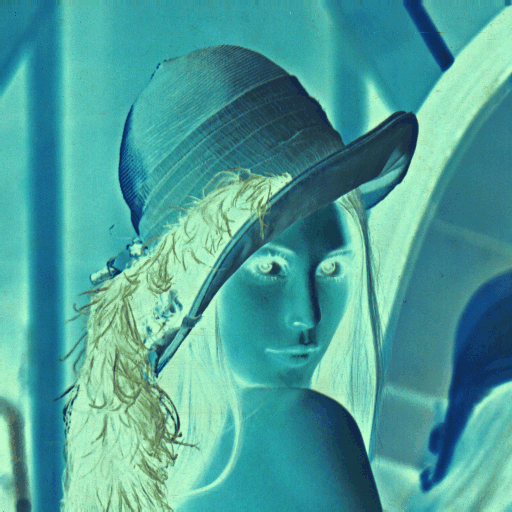

In [4]:
# Lena GIF image
neg_arr = negative_img(img_gif, img_gif.mode)
neg_img = Image.fromarray(neg_arr)
neg_img.save('lena-negative-color.png')
neg_img

### Grayscale JPG negative image

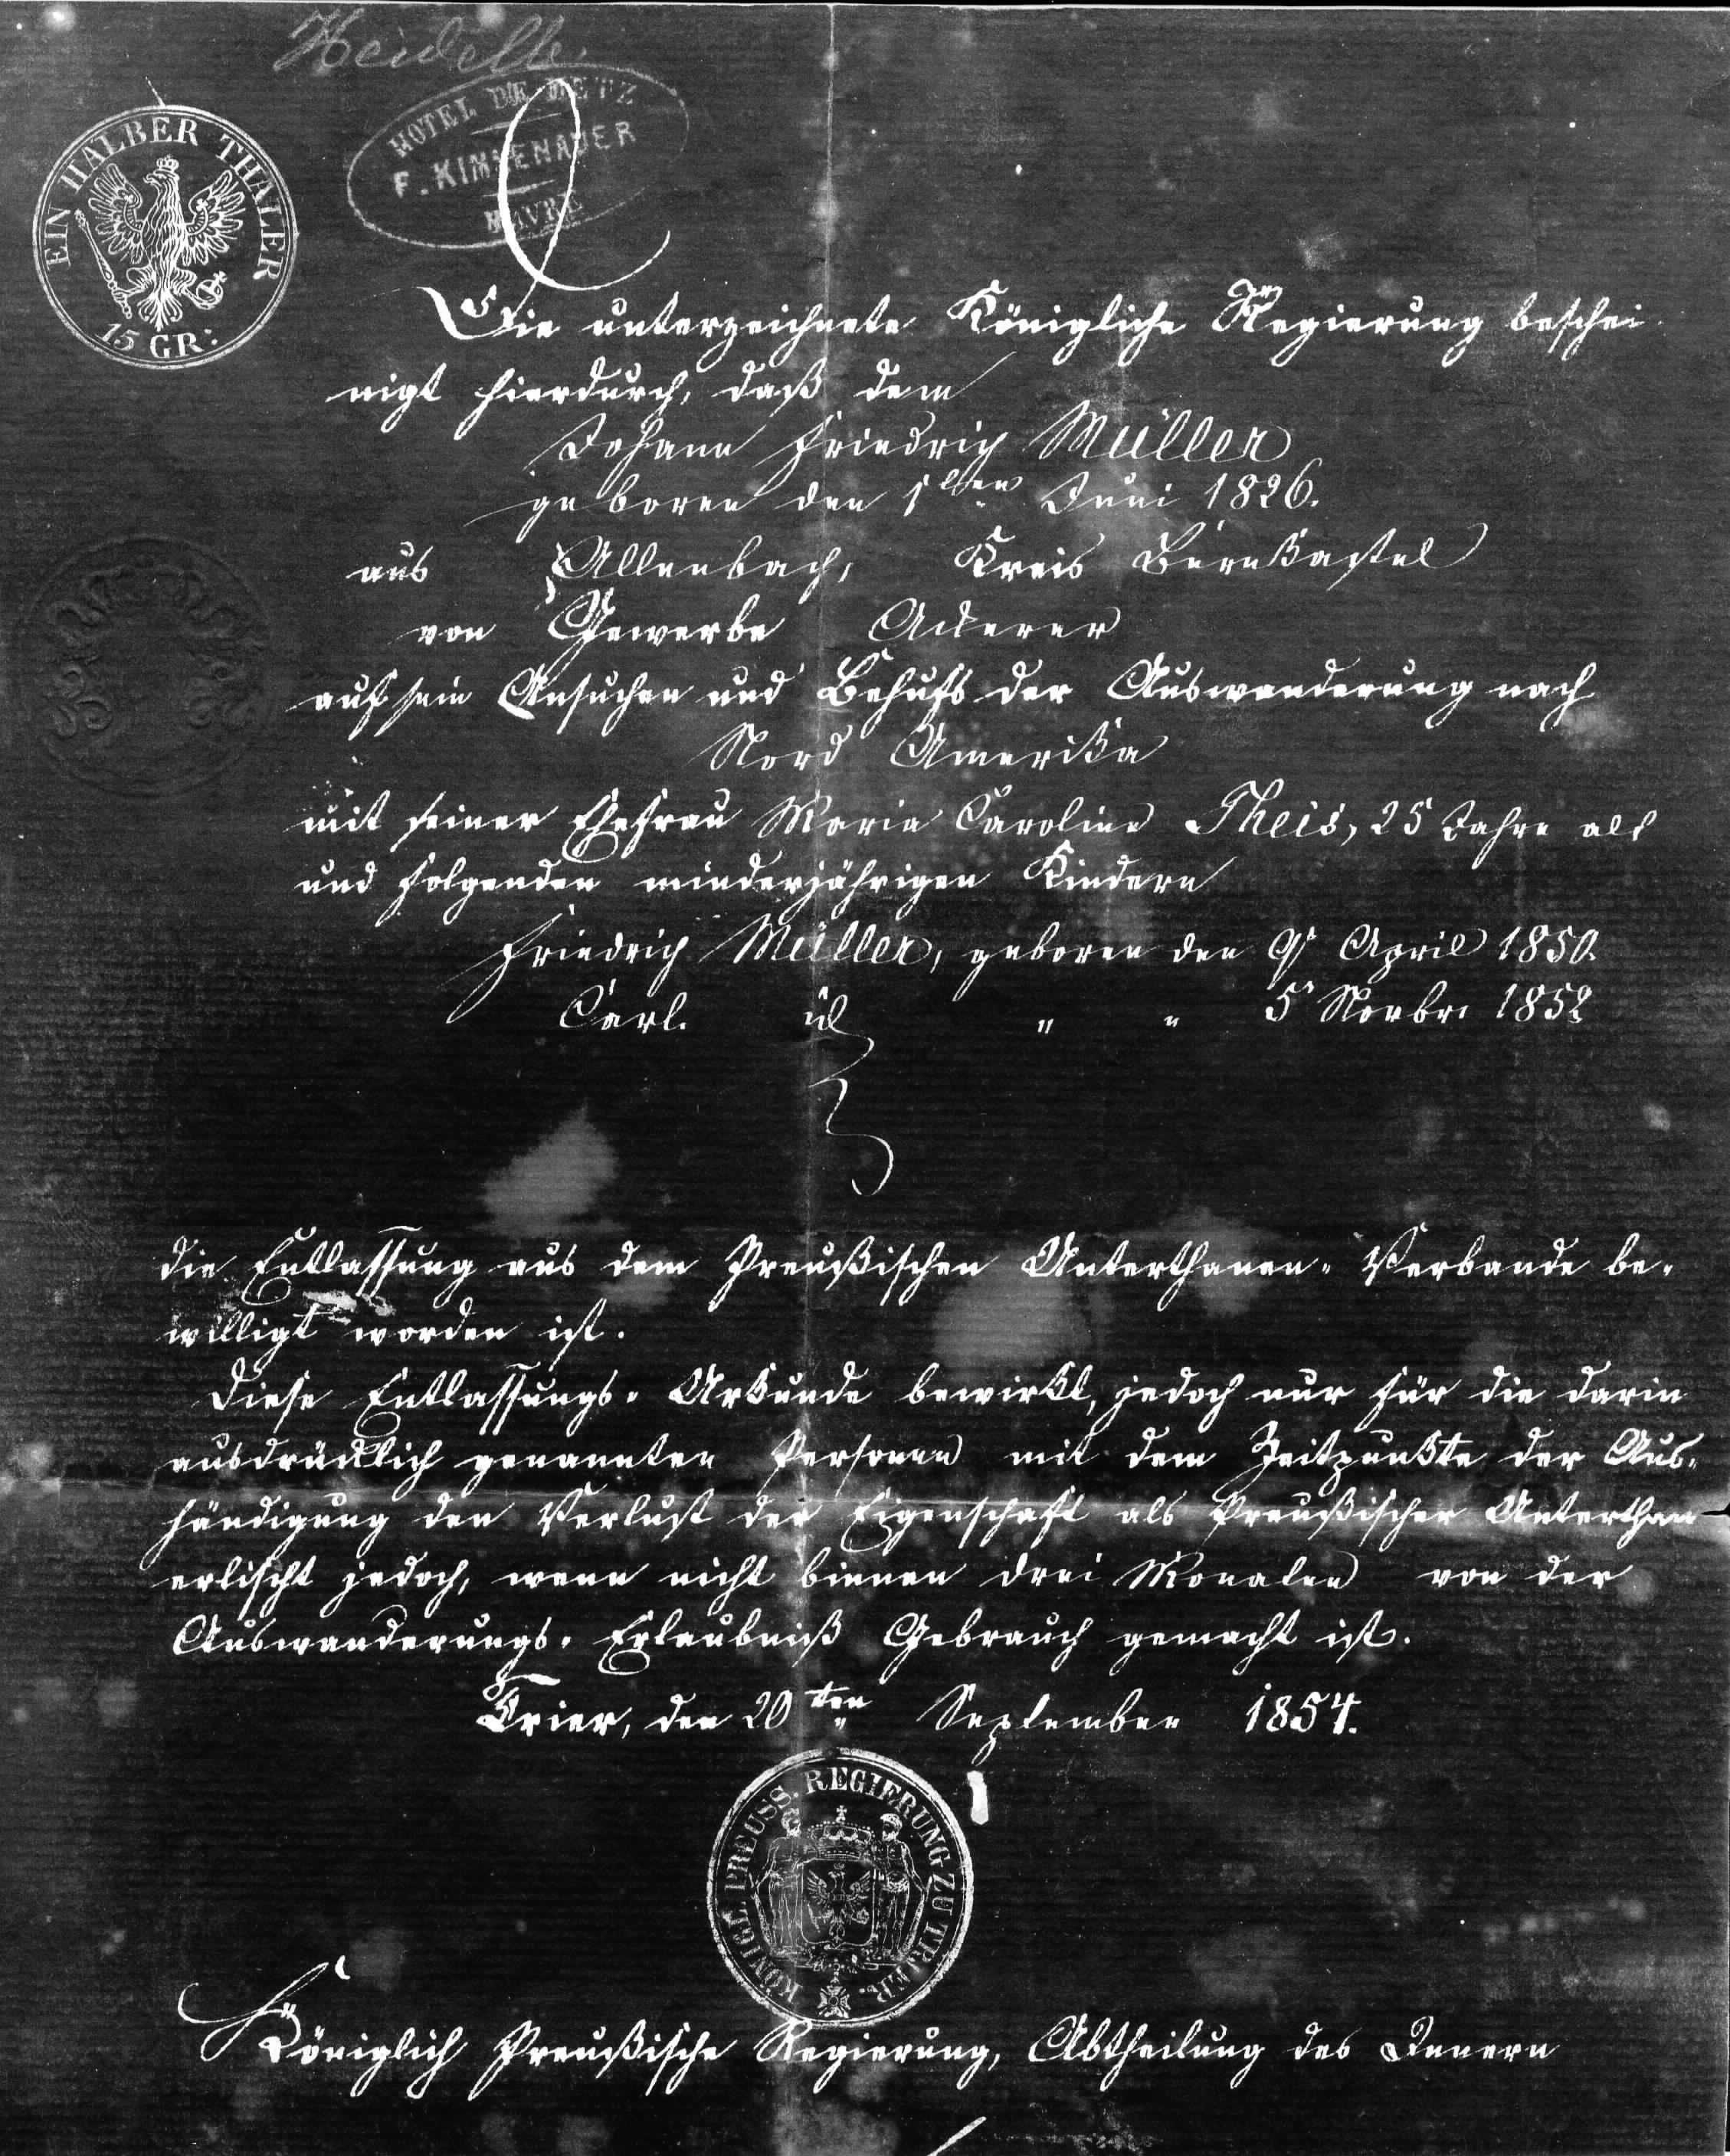

In [29]:
neg_arr = negative_img(img_grayscale, img_grayscale.mode)
neg_img = Image.fromarray(neg_arr)
neg_img

### Binarized Negative Image

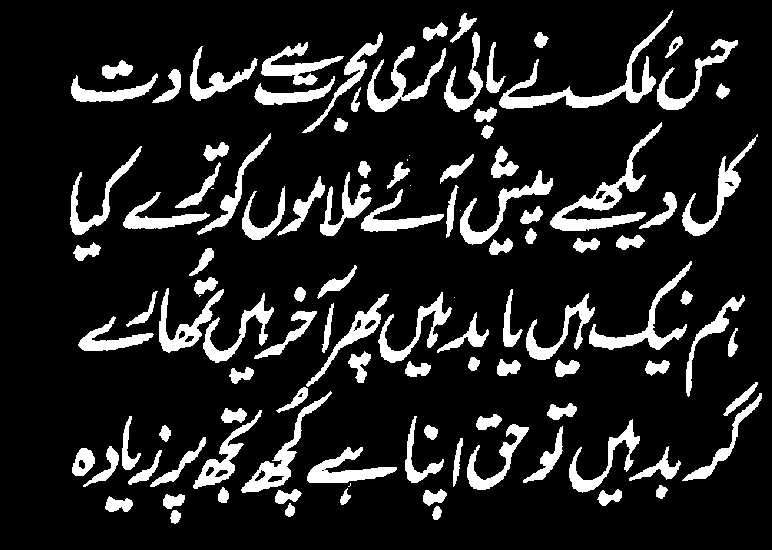

In [6]:
neg_arr = negative_img(img_binarized, img_binarized.mode)
neg_img = Image.fromarray(neg_arr)
neg_img

## Task 2: Image Gradients
The horizontal gradient image can be used to detect vertical edges in an image. Implement a function for displaying the horizontal gradient of a grayscale image.


In [15]:
import cv2

In [33]:
im= Image.open("lena_color.gif").convert("L")

pix=np.asarray(im)
# print(np.min(pix))

# print (im.size)
# print (im.mode)

w,h =im.size
print(pix.shape)
print(w)
print(h)

gradient = np.zeros((h,w-1))

print(gradient.shape)

if (im.mode == 'L'):
    for i in range(w-1): #column
        for j in range(h): #row
            if(i<w-1):
                gradient[i][j] = pix[i+1][j] - pix[i][j]   



minValue=np.min(gradient)
maxValue = np.max(gradient)

print('Pix: ',pix)
print('gradient before:\n ',gradient[5][:40])
print('Max: ', maxValue)
print('Min: ', minValue)


for i in range(h):
        for j in range(w): 
            gradient[i][j] = (gradient[i][j] - minValue) / (maxValue-minValue) * 255

                
                
print('gradient After:\n ',gradient[5][:40])
cv2.imwrite("./lenna-gradient.png", gradient)
# im.save("lenna-gradient.png")

(512, 512)
512
512
(512, 511)


IndexError: index 511 is out of bounds for axis 0 with size 511

### Task 3: Bit Plane Slicing

In [39]:
img_tif = Image.open('bitplane.tif')
img = np.asarray(img_tif)
# print(img[0][0:10])

lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8))


eighth_bit_img_arr = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seventh_bit_img_arr = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
sixth_bit_img_arr = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
fifth_bit_img_arr = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
fourth_bit_img_arr = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
third_bit_img_arr = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
second_bit_img_arr = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
first_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])



bit_plane_8_img = Image.fromarray(eighth_bit_img_arr)
bit_plane_7_img = Image.fromarray(seventh_bit_img_arr)
bit_plane_6_img = Image.fromarray(sixth_bit_img_arr)
bit_plane_5_img = Image.fromarray(fifth_bit_img_arr)
bit_plane_4_img = Image.fromarray(fourth_bit_img_arr)
bit_plane_3_img = Image.fromarray(third_bit_img_arr)
bit_plane_2_img = Image.fromarray(second_bit_img_arr)
bit_plane_1_img = Image.fromarray(first_bit_img)

bit_plane_8_img.save('bit_plane_8_img.png')
bit_plane_7_img.save('bit_plane_7_img.png')
bit_plane_6_img.save('bit_plane_6_img.png')
bit_plane_5_img.save('bit_plane_5_img.png')
bit_plane_4_img.save('bit_plane_4_img.png')
bit_plane_3_img.save('bit_plane_3_img.png')
bit_plane_2_img.save('bit_plane_2_img.png')
bit_plane_1_img.save('bit_plane_1_img.png')



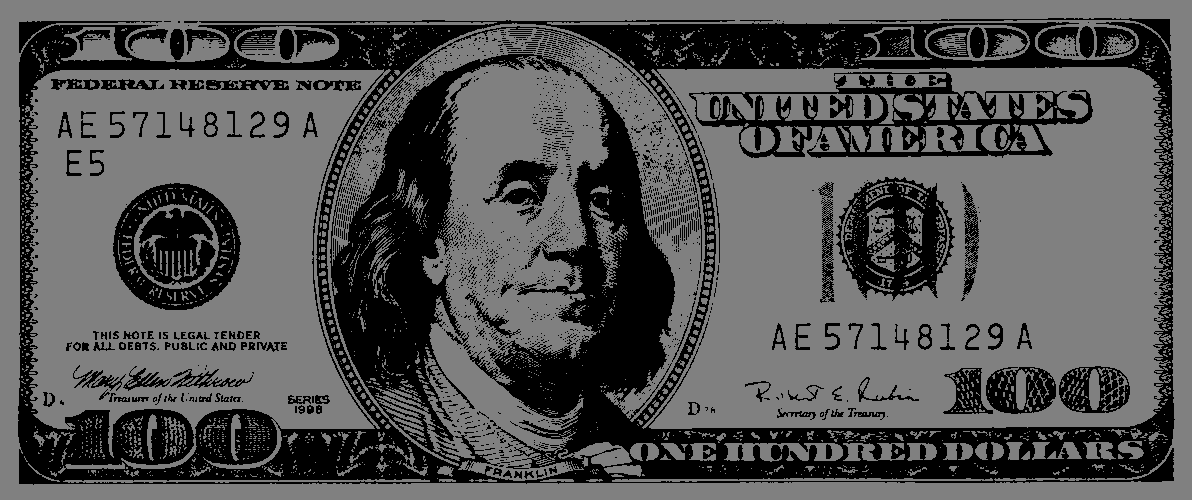

In [36]:
bit_plane_8_img

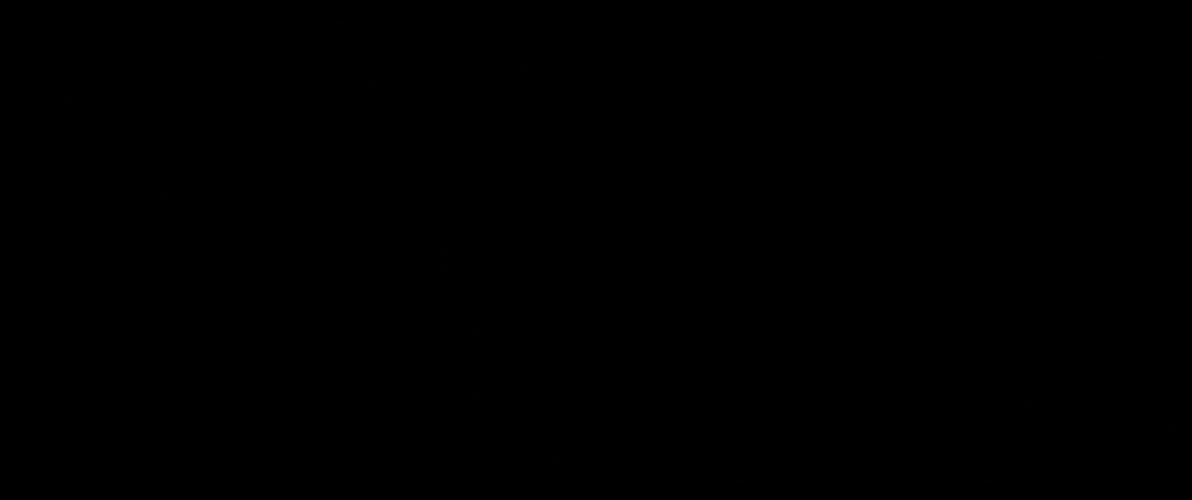

In [38]:
bit_plane_1_img